In [1]:
# Import modules

#import wget
import constants as const 
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
import statistics
import seaborn as sns

In [2]:
# Download dataset and load it as a Pandas DataFrame

#wget.download(https://opendata-renewables.engie.com//media/datasets/d543716b-368d-4c53-8fb1-55addbe8d3ad.zip)
#wget.download(https://opendata-renewables.engie.com//media/datasets/01c55756-5cd6-4f60-9f63-2d771bb25a1a.zip)

raw_dataset = pd.read_csv('../Datasets/dataset_reduced.csv',sep=',')
print(raw_dataset.shape)

(602649, 17)


In [3]:
# Statistics of each column
raw_dataset.describe()

,theta,hub_temperature,nacelle_angle,nacelle_temperature,V1,V2,V,Wind_angle,Vane_angle,Out_temperature,W,Rotor_temperature,Wind_angle_c,nacelle_angle_c,T,P
count,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,602649.000000,6.026490e+05
mean,-0.081045,19.060174,-28.785794,24.595032,6.306669,6.321526,6.314169,-28.404289,-0.184985,11.473260,1.362470,28.486577,-29.302312,-29.710568,2646.532389,4.448609e+05
std,5.978549,5.838598,111.742447,6.192875,2.018830,1.956744,1.982688,112.121101,9.427393,7.091906,0.318853,4.714501,111.841797,111.627225,2258.267705,4.463492e+05
min,-1.080000,4.050000,-180.000000,1.490000,0.000000,0.000000,0.230000,-180.000000,-179.340000,-6.950000,0.000000,4.100000,-180.000000,-180.000000,0.000000,0.000000e+00
25%,-1.000000,14.170000,-130.160000,20.639999,4.950000,4.990000,4.970000,-130.640000,-5.310000,5.960000,1.092227,25.500000,-131.039990,-131.009990,1056.880000,1.234200e+05
50%,-0.990000,18.719999,-59.269990,25.110001,5.870000,5.900000,5.890000,-57.989990,-0.460000,10.910000,1.348790,28.540001,-60.810000,-61.769990,1974.220000,2.836200e+05
75%,-0.900000,23.000000,55.330002,28.969999,7.130000,7.140000,7.130000,56.000000,4.800000,16.330000,1.665044,31.650000,55.939999,55.330002,3409.580100,6.040200e+05
max,92.760002,39.000000,179.990010,42.910000,21.280001,20.150000,20.500000,179.990010,179.750000,38.279999,1.803274,46.090000,179.990010,179.990010,10875.700000,2.051870e+06


In [4]:
# Select columns 

# Discard variables related with power and torque
data_turbines = raw_dataset.copy()
print('Complete list of column names:')
print(data_turbines.columns.values)
#data_turbines = data_turbines.drop(['Q','S','P','Cosphi','Rm','Cm'],axis=1)
#data_turbines = data_turbines[['Wind_turbine_name','Ba_avg','Rt_avg','DCs_avg','Ds_avg','Db1t_avg','Db2t_avg','Dst_avg','Gb1t_avg','Gb2t_avg','Git_avg','Gost_avg','Ya_avg','Yt_avg','Ws1_avg','Ws2_avg','Ws_avg','Wa_avg','Va1_avg','Va2_avg','Va_avg','Ot_avg','Nf_avg','Nu_avg','Rs_avg','Rbt_avg','Rm_avg','Pas_avg','Wa_c_avg','Na_c_avg']]

# Select only external features, not involving the generator and gearbox parts, which are consecuence of the inputs
# And operational variables such as pitch angle or temperature of components
data_turbines = data_turbines[['turbine','V','theta','W','Out_temperature','P']]
print('Reduced list of column names:')
print(data_turbines.columns.values)

print()
print(data_turbines.shape)

Complete list of column names:
['turbine' 'theta' 'hub_temperature' 'nacelle_angle' 'nacelle_temperature'
 'V1' 'V2' 'V' 'Wind_angle' 'Vane_angle' 'Out_temperature' 'W'
 'Rotor_temperature' 'Wind_angle_c' 'nacelle_angle_c' 'T' 'P']
Reduced list of column names:
['turbine' 'V' 'theta' 'W' 'Out_temperature' 'P']

(602649, 6)


In [5]:
# Convert theta angles to [-pi, pi] range
#data_turbines['theta'] = (data_turbines['theta'] + np.pi) % (2 * np.pi) - np.pi

# Angles are in degress in the range [-180,180]

In [5]:
# Statistics of each column
data_turbines.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V,602649.0,6.314169,1.982688,0.23,4.970000,5.89000,7.130000,2.050000e+01
theta,602649.0,-0.081045,5.978549,-1.08,-1.000000,-0.99000,-0.900000,9.276000e+01
W,602649.0,1.362470,0.318853,0.00,1.092227,1.34879,1.665044,1.803274e+00
Out_temperature,602649.0,11.473260,7.091906,-6.95,5.960000,10.91000,16.330000,3.828000e+01
P,602649.0,444860.879260,446349.165241,0.00,123420.000000,283620.00000,604020.020000,2.051870e+06


In [6]:
# Counting NaN values in all columns
nan_count = data_turbines.isna().sum()
print(nan_count)

turbine            0
V                  0
theta              0
W                  0
Out_temperature    0
P                  0
dtype: int64


In [7]:
# Display the unique values in the 'Wind_turbine_name' column
unique_turbine_names = data_turbines['turbine'].unique()
print(unique_turbine_names)

print(data_turbines.head())

['R80711' 'R80736' 'R80790' 'R80721']
  turbine     V  theta    W  Out_temperature    P
0  R80711  0.24   45.0  0.0        16.410000  0.0
1  R80711  0.38   45.0  0.0         6.790000  0.0
2  R80711  0.25   45.0  0.0        18.920000  0.0
3  R80711  0.32   45.0  0.0        28.129999  0.0
4  R80711  0.34   45.0  0.0         3.130000  0.0


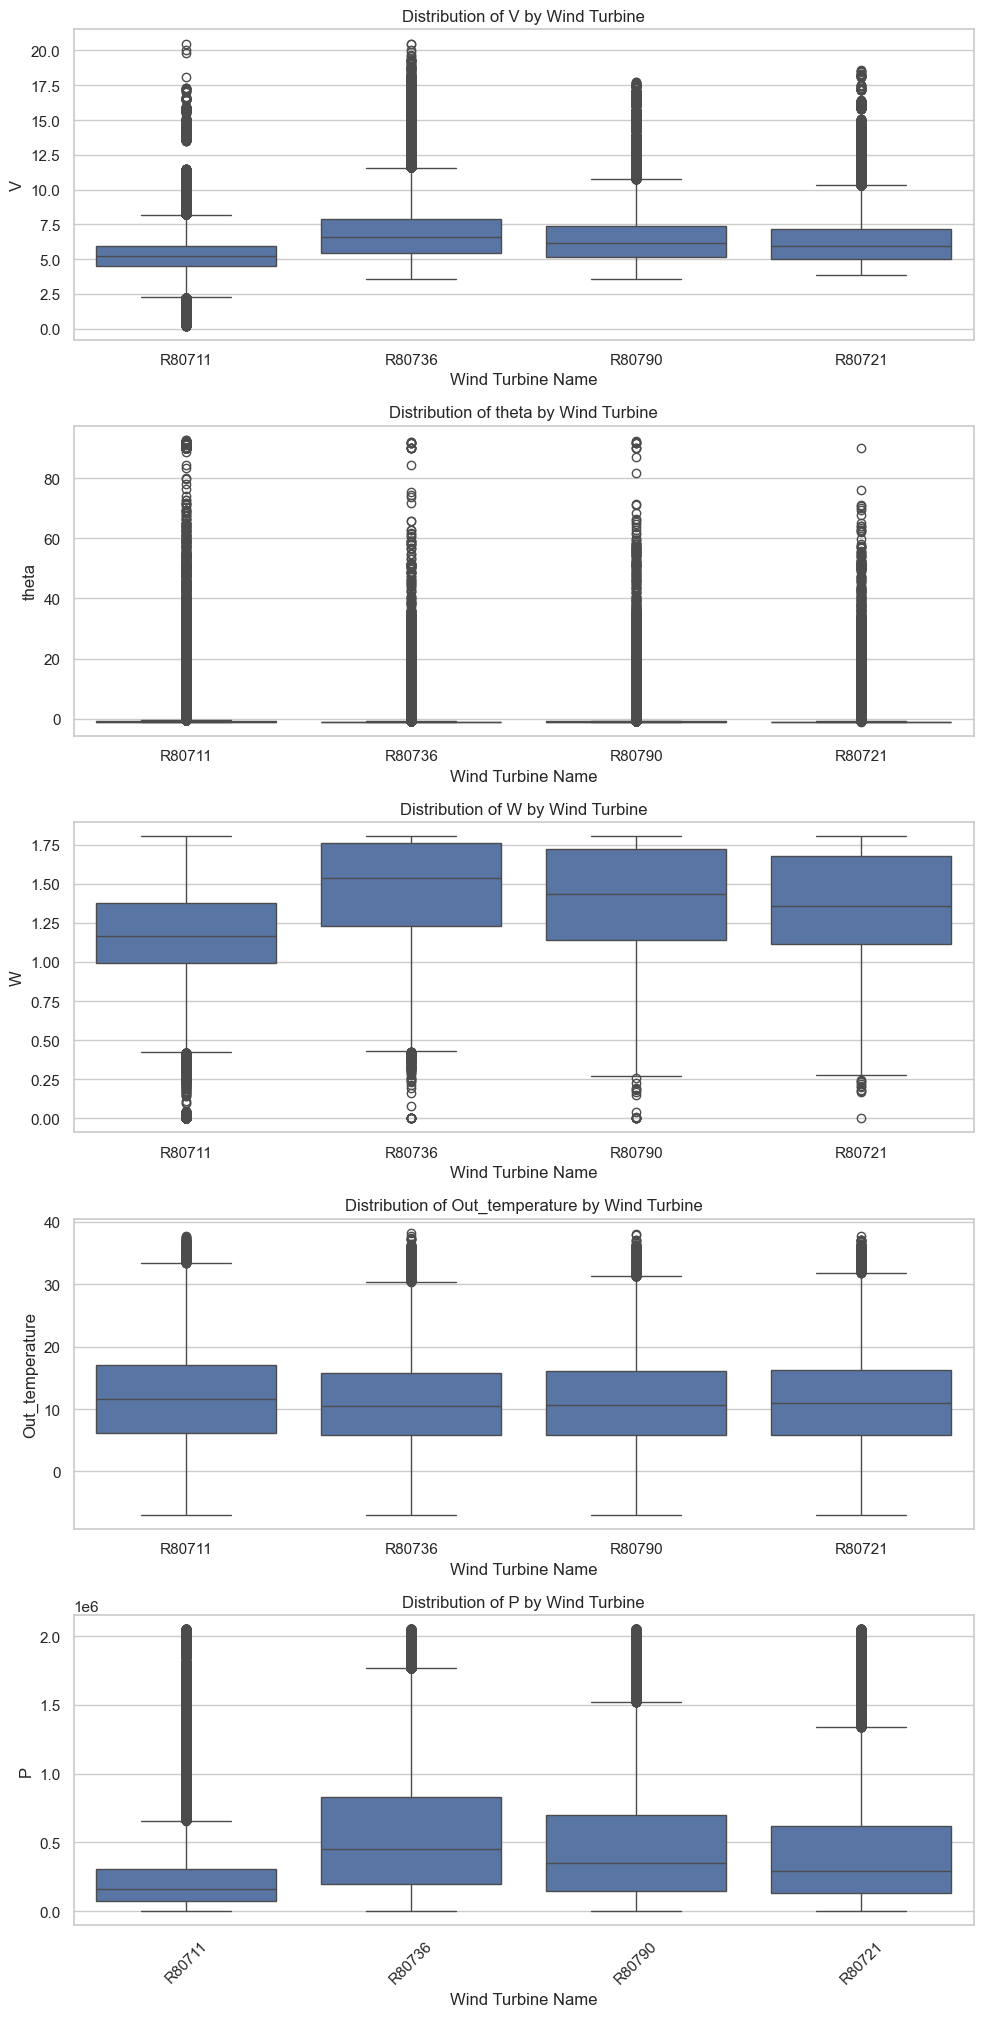

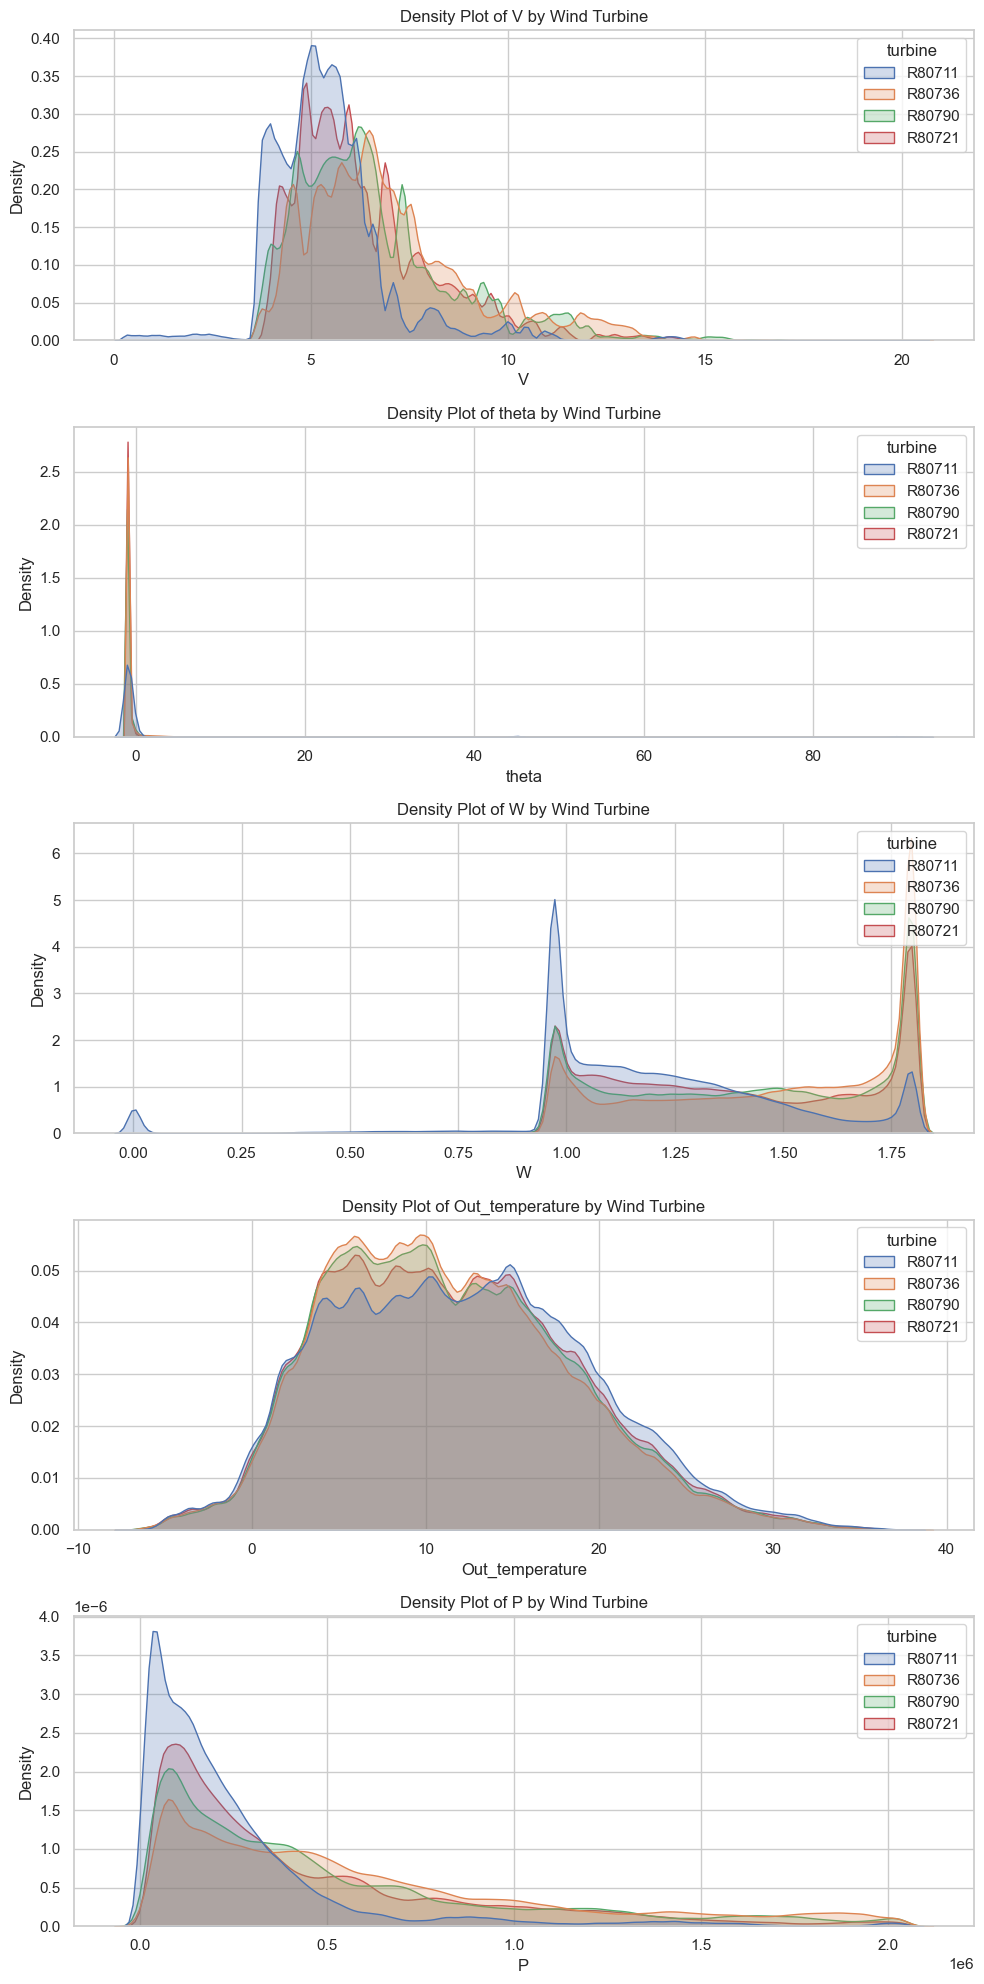

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_turbines_cleaned is already defined and contains the relevant columns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# List of variables to plot
variables = ['V', 'theta', 'W', 'Out_temperature', 'P']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 20))

# Iterate through each variable and create a box plot or violin plot
for i, var in enumerate(variables):
    sns.boxplot(data=data_turbines, x='turbine', y=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Wind Turbine')
    axes[i].set_xlabel('Wind Turbine Name')
    axes[i].set_ylabel(var)

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# List of variables to plot
variables = ['V', 'theta', 'W', 'Out_temperature', 'P']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 20))

# Iterate through each variable and create a density plot
for i, var in enumerate(variables):
    sns.kdeplot(data=data_turbines, x=var, hue='turbine', fill=True, ax=axes[i], bw_adjust=0.5, common_norm=False)
    axes[i].set_title(f'Density Plot of {var} by Wind Turbine')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

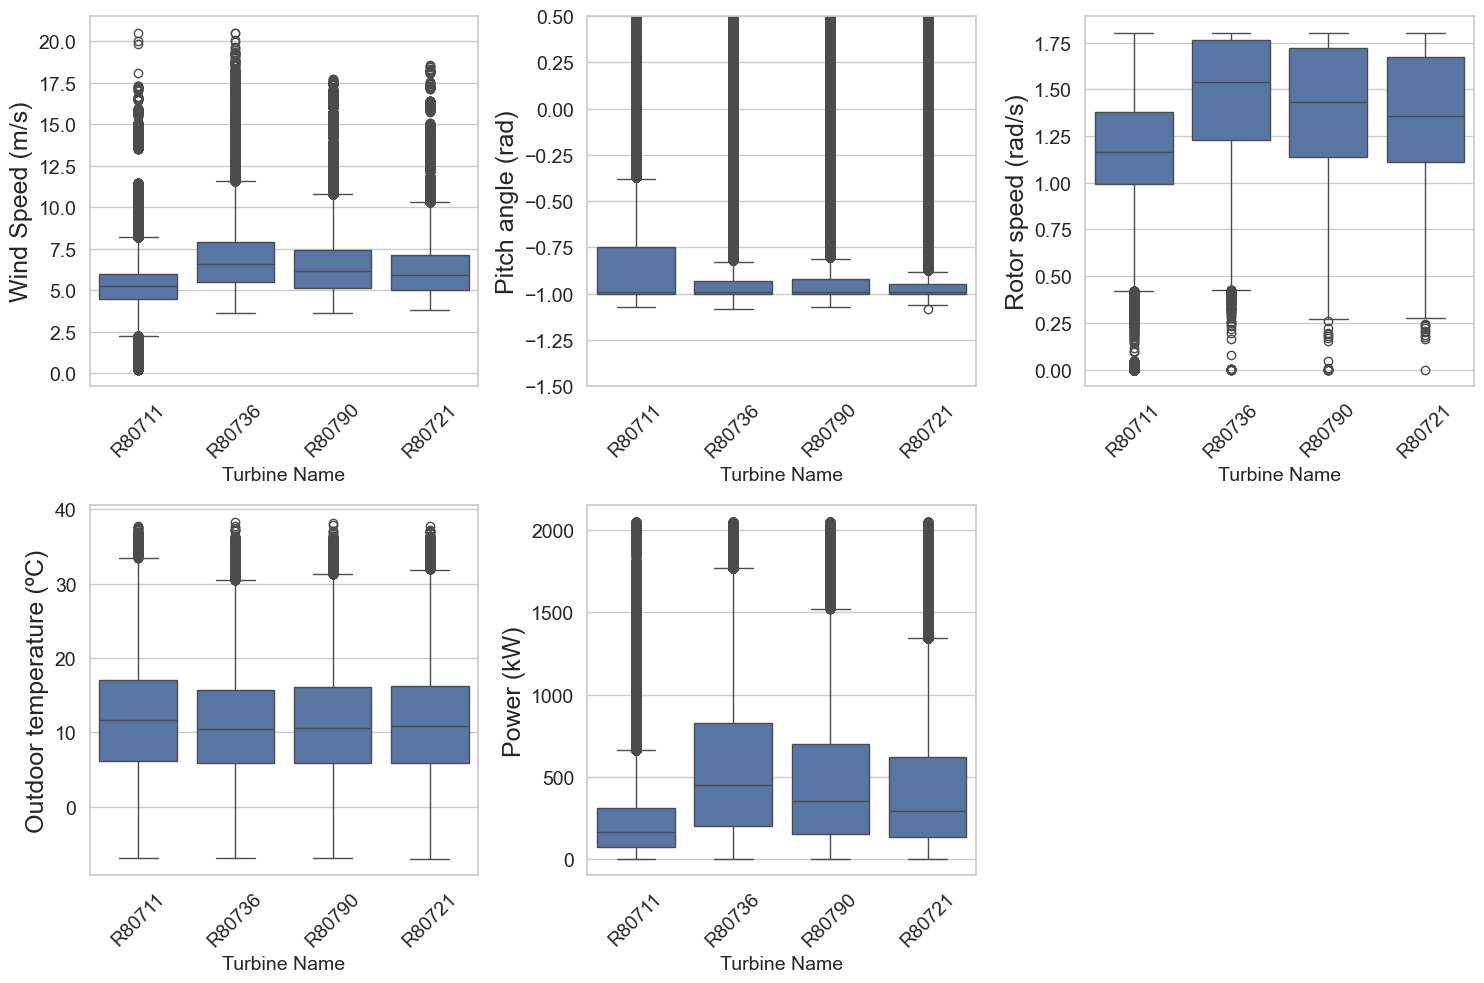

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Establecer los estilos para los gráficos
sns.set(style="whitegrid")

# Lista de variables a graficar
variables = ['V', 'theta', 'W', 'Out_temperature', 'P']
y_labels = ['Wind Speed (m/s)', 'Pitch angle (rad)', 'Rotor speed (rad/s)', 'Outdoor temperature (ºC)', 'Power (kW)']

# Crear una figura con subgráficas, 2 filas y 3 columnas (dejamos una subgráfica vacía)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Cambié el tamaño para 2 filas y 3 columnas

# Aplanamos el arreglo de ejes para poder indexarlos fácilmente
axes = axes.flatten()

# Iterar sobre cada variable y crear un box plot
for i, var in enumerate(variables):
    # Si la variable es 'P', dividimos por 1000 para convertirla a kW
    if var == 'P':
        sns.boxplot(data=data_turbines, x='turbine', y=data_turbines[var] / 1000, ax=axes[i])
    else:
        sns.boxplot(data=data_turbines, x='turbine', y=var, ax=axes[i])

    # Establecer títulos y etiquetas con tamaños de fuente más grandes
    #axes[i].set_title(f'Distribution of {var} by Wind Turbine', fontsize=16)  # Título más grande
    #axes[i].set_xlabel('Wind Turbine Name', fontsize=18)  # Etiqueta del eje x más grande
    axes[i].set_xlabel('Turbine Name', fontsize=14)
    #axes[i].set_ylabel(var, fontsize=18)  # Etiqueta del eje y más grande
    axes[i].set_ylabel(y_labels[i], fontsize=18)  # Etiqueta del eje y con los nuevos nombres

    # Ajustar la rotación de las etiquetas del eje x
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)  # Tamaño de fuente de las etiquetas del eje x
    axes[i].tick_params(axis='y', labelsize=14)  # Tamaño de fuente de las etiquetas del eje y

    # Establecer el rango del eje Y para 'theta'
    if var == 'theta':
        axes[i].set_ylim([-1.5, 0.5])

# Eliminar cualquier subgráfico vacío (en este caso, el último)
fig.delaxes(axes[-1])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

  turbine   Cp  lambda
0  R80711  0.0     0.0
1  R80711  0.0     0.0
2  R80711  0.0     0.0
3  R80711  0.0     0.0
4  R80711  0.0     0.0


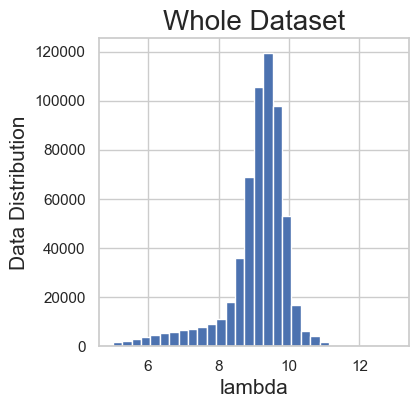

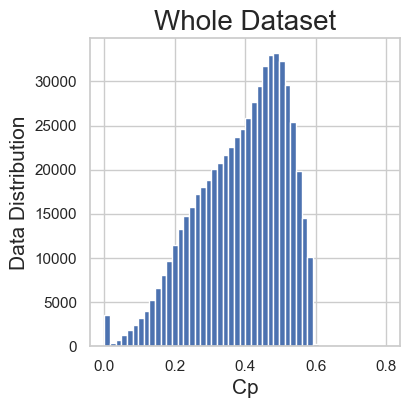

In [26]:
# Calculate 'Cp' and 'lambda'
data_turbines['Cp'] = data_turbines['P'] / (0.5 * const.rho * const.A * data_turbines['V'] ** 3)
data_turbines['lambda'] = (data_turbines['W'] * const.R) / data_turbines['V']

# Display the first few rows of the updated DataFrame
print(data_turbines[['turbine', 'Cp', 'lambda']].head())

# Histogram of lambda
plt.figure(figsize=(4,4))
plt.hist(data_turbines['lambda'], range=[5, 13], bins=30)
#plt.hist(lambd_data, range=[0, 20], bins=50)
plt.xlabel('lambda',fontsize=15)
plt.ylabel('Data Distribution',fontsize=15)
plt.title('Whole Dataset',fontsize=20)
plt.show()

# Histogram of Cp
plt.figure(figsize=(4,4))
plt.hist(data_turbines['Cp'], range=[0.0, 0.8], bins=50)
plt.xlabel('Cp',fontsize=15)
plt.ylabel('Data Distribution',fontsize=15)
plt.title('Whole Dataset',fontsize=20)
plt.show()

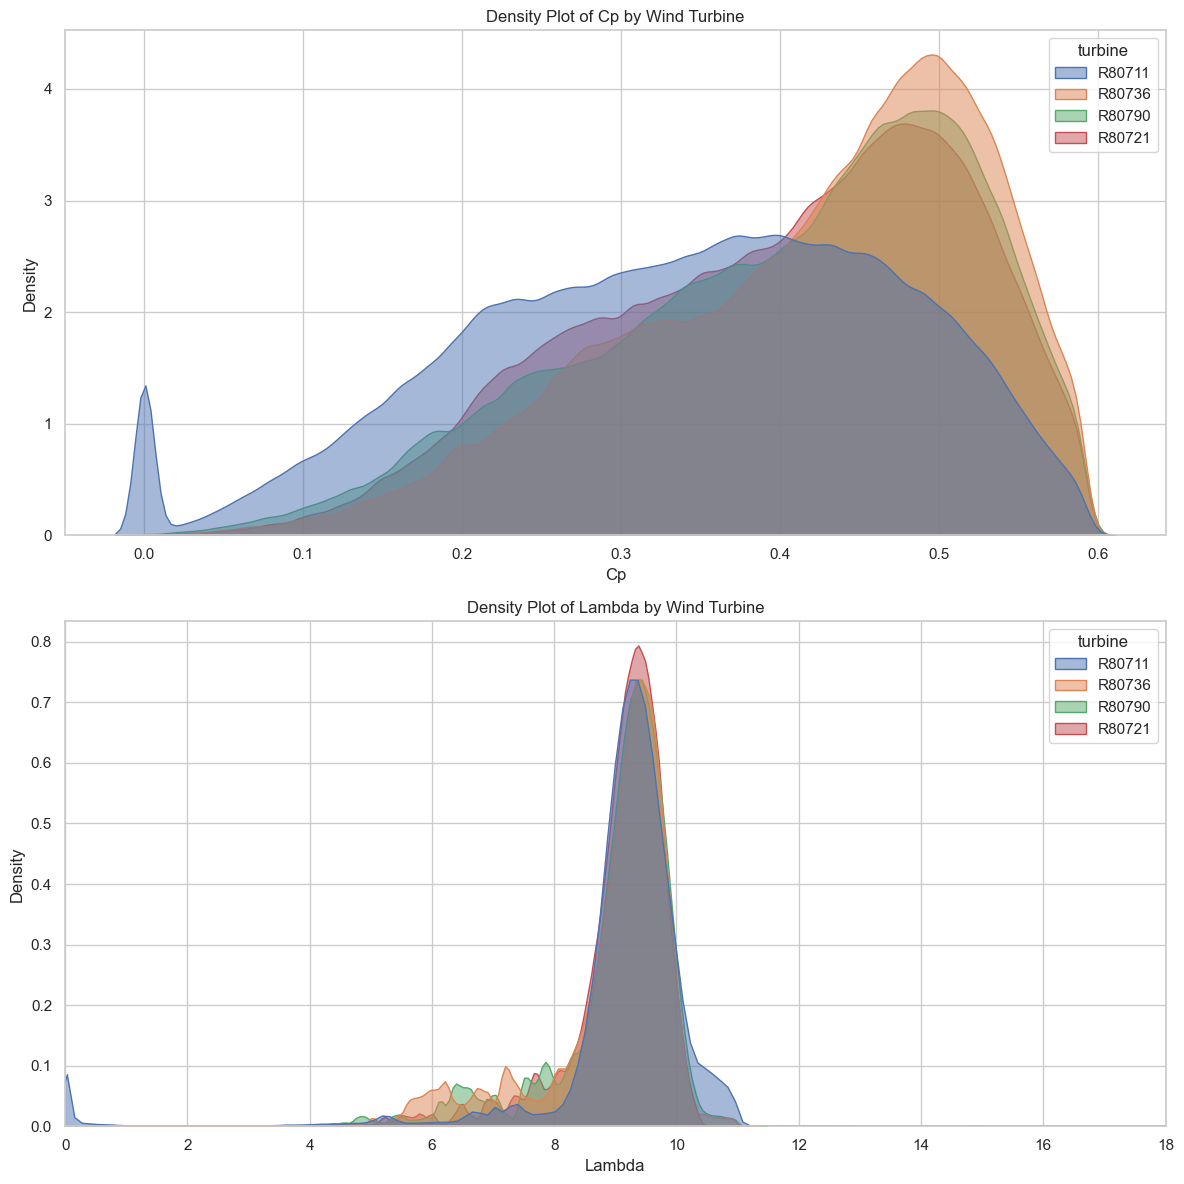

In [27]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Density plot for 'Cp'
sns.kdeplot(data=data_turbines, x='Cp', hue='turbine', fill=True, ax=axes[0], bw_adjust=0.5, common_norm=False, alpha=0.5)
axes[0].set_title('Density Plot of Cp by Wind Turbine')
axes[0].set_xlabel('Cp')
axes[0].set_ylabel('Density')

# Density plot for 'lambda'
sns.kdeplot(data=data_turbines, x='lambda', hue='turbine', fill=True, ax=axes[1], bw_adjust=0.5, common_norm=False, alpha=0.5)
axes[1].set_title('Density Plot of Lambda by Wind Turbine')
axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('Density')
plt.xlim((0,18))

# Adjust layout
plt.tight_layout()
plt.show()

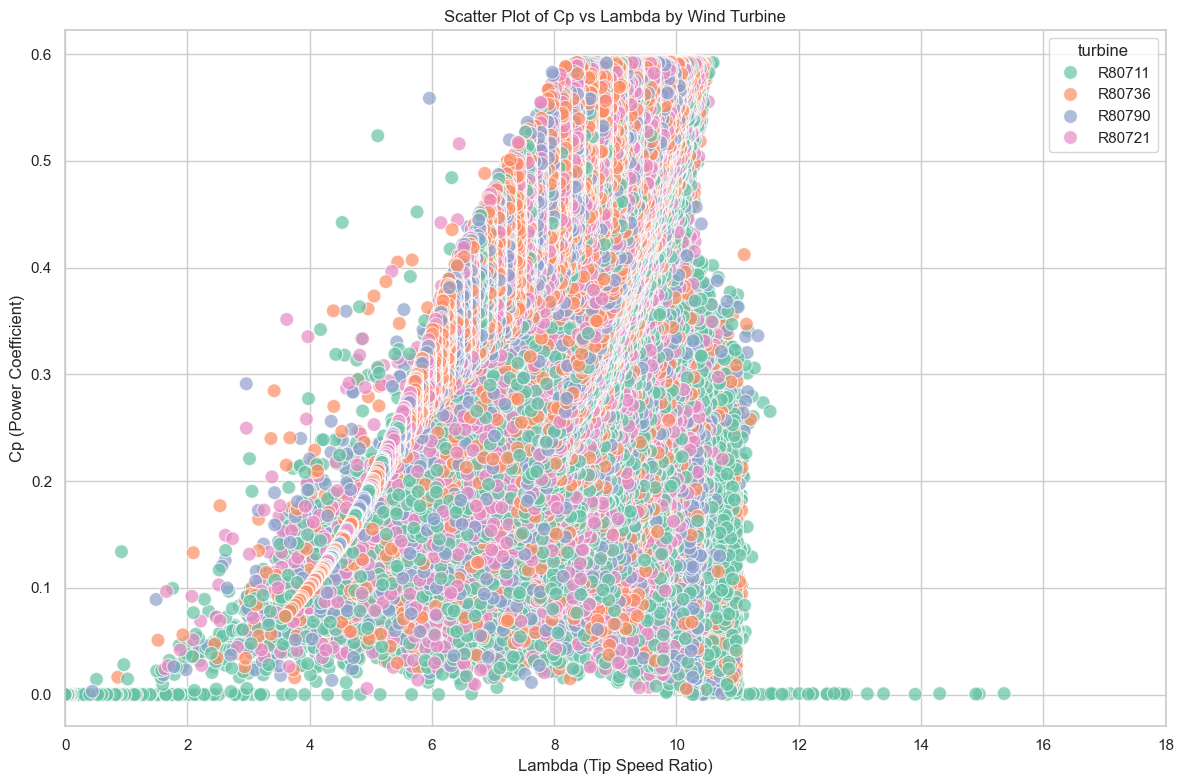

In [28]:
# Create a scatter plot of 'Cp' vs 'lambda' with different colors for each turbine
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data_turbines, x='lambda', y='Cp', hue='turbine', palette='Set2', s=100, alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of Cp vs Lambda by Wind Turbine')
plt.xlabel('Lambda (Tip Speed Ratio)')
plt.ylabel('Cp (Power Coefficient)')
plt.xlim((0,18))

# Show the plot
plt.tight_layout()
plt.show()

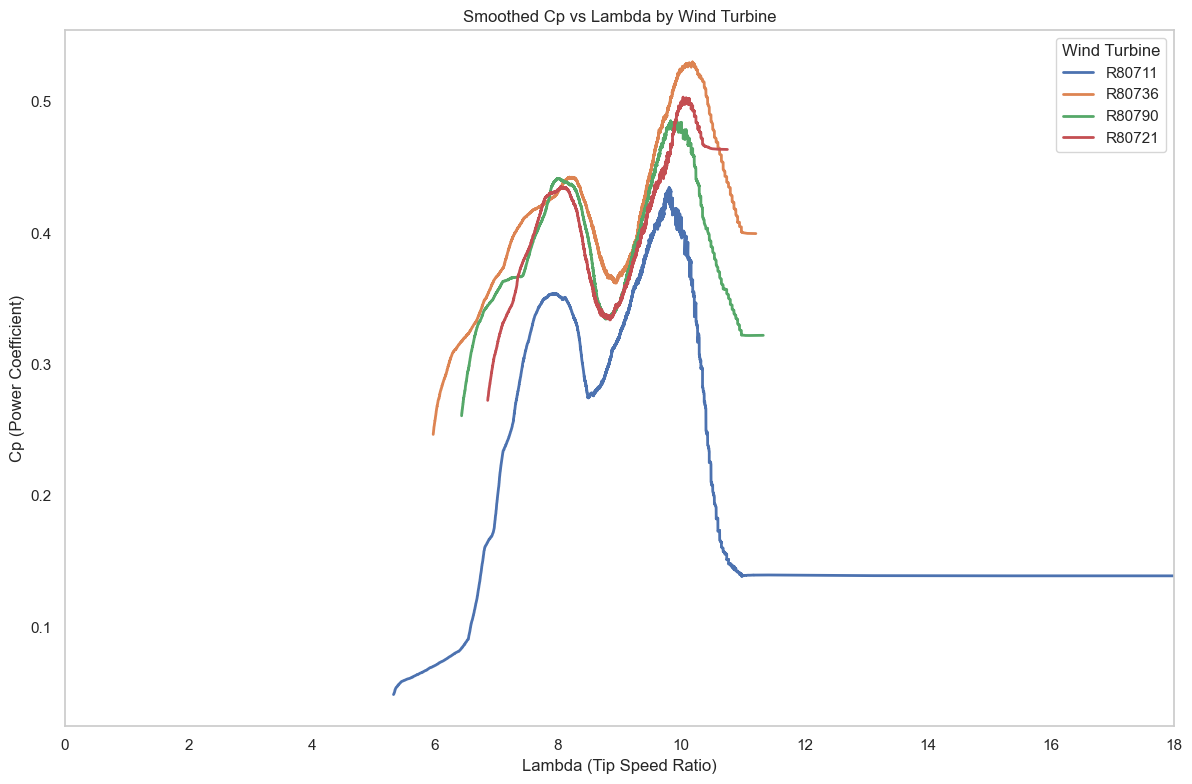

(602649, 8)


In [12]:
# Assuming 'data_turbines' contains 'Cp', 'lambda', and 'Wind_turbine_name'
dataset = data_turbines.copy()  # Replace with your actual DataFrame if needed

# Step 1: Set the window size for moving average
window_size = 5000  # Adjust the window size based on your dataset size

# Step 2: Set up the plot
plt.figure(figsize=(12, 8))

# Step 3: Iterate through each unique wind turbine and plot
for turbine in dataset['turbine'].unique():
    # Filter the data for the current turbine
    turbine_data = dataset[dataset['turbine'] == turbine]
    
    # Convert 'lambda' and 'Cp' to numpy arrays
    x = turbine_data['lambda'].to_numpy()
    y = turbine_data['Cp'].to_numpy()
    
    # Sort the 'lambda' (x) and corresponding 'Cp' (y) values
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    # Ensure y_sorted is a 1D array
    y_sorted = y_sorted.ravel()
    
    # Step 4: Calculate moving average using convolution
    y_smoothed = np.convolve(y_sorted, np.ones(window_size) / window_size, mode='valid')
    
    # Step 5: Plot the moving average for the current turbine
    plt.plot(x_sorted[window_size-1:], y_smoothed, label=turbine, linewidth=2)

# Step 6: Add titles and labels
plt.title('Smoothed Cp vs Lambda by Wind Turbine')
plt.xlabel('Lambda (Tip Speed Ratio)')
plt.ylabel('Cp (Power Coefficient)')

# Step 7: Add a legend to differentiate the turbines
plt.legend(title='Wind Turbine')

# Step 8: Show grid for better readability
plt.grid()

# Step 9: Show the plot
plt.tight_layout()
plt.xlim((0,18))
plt.show()

print(data_turbines.shape)

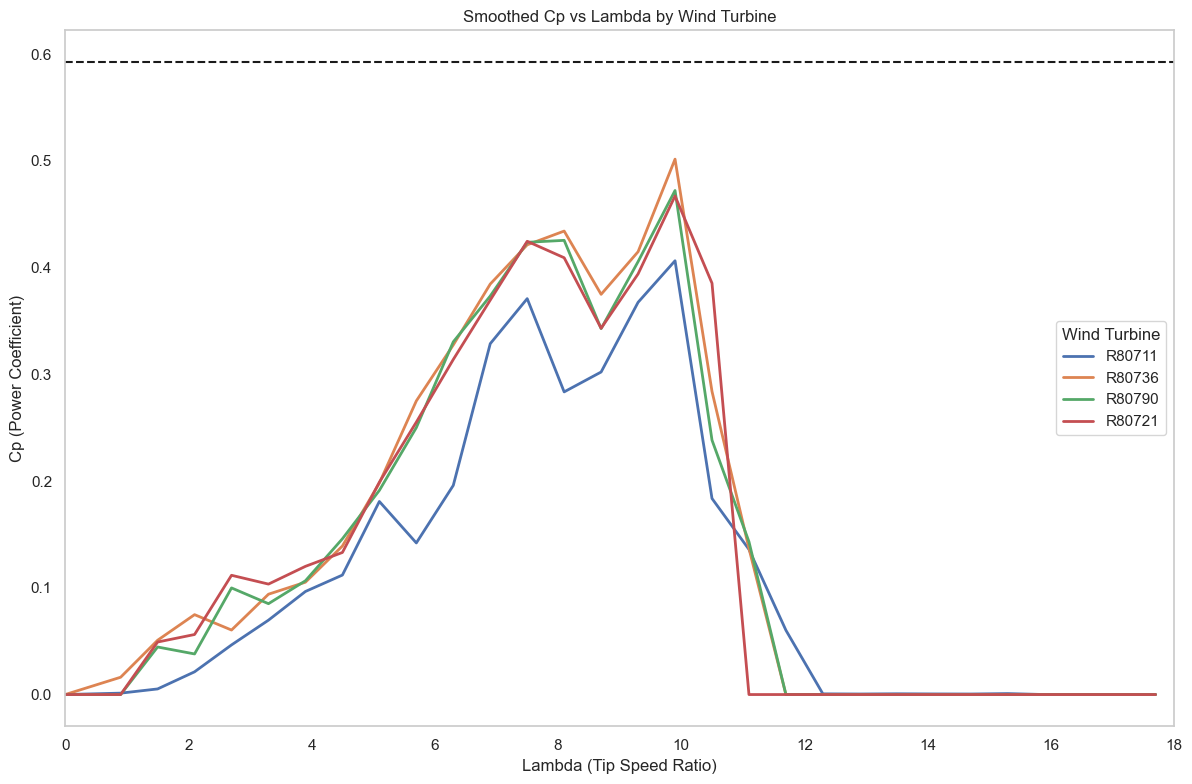

(602649, 8)


In [29]:
# Assuming 'data_turbines' contains 'Cp', 'lambda', and 'turbine'
dataset = data_turbines.copy()  # Replace with your actual DataFrame if needed

plt.figure(figsize=(12, 8))

# Iterate through each unique wind turbine and plot
for turbine in dataset['turbine'].unique():
    # Filter the data for the current turbine
    turbine_data = dataset[dataset['turbine'] == turbine]
    
    # Convert 'lambda' and 'Cp' to numpy arrays
    lambd_data = turbine_data['lambda'].to_numpy()
    Cp_data = turbine_data['Cp'].to_numpy()
    
    # Estimate the Cp curve with the median
    lmin = 0
    lmax = 18
    nbins = 30
    dl = (lmax-lmin)/nbins
    Cp_estimated = np.zeros(nbins)
    lambd_estimated = np.zeros(nbins)

    for i in range(1,nbins):
        lambdal = lmin + i*dl
        lambdar = lambdal + dl

        # Median of Cp in the bin i
        lambd_estimated[i] = (lambdal+lambdar)/2.0
        l_subset = (lambdal<lambd_data) & (lambd_data<lambdar)  # subset of lambda points of the bin
        Cpi = Cp_data[l_subset]     # Cp distribution of bin i
        if (len(Cpi)>0):
            Cp_estimated[i]=statistics.mean(Cpi)

    plt.plot(lambd_estimated, Cp_estimated, label=turbine, linewidth=2)

Cp_max = 0.5926
plt.axhline(y=Cp_max, color = 'k', linestyle = '--')

# Add titles and labels
plt.title('Smoothed Cp vs Lambda by Wind Turbine')
plt.xlabel('Lambda (Tip Speed Ratio)')
plt.ylabel('Cp (Power Coefficient)')

# Add a legend to differentiate the turbines
plt.legend(title='Wind Turbine')

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.xlim((0,18))
plt.show()

print(data_turbines.shape)

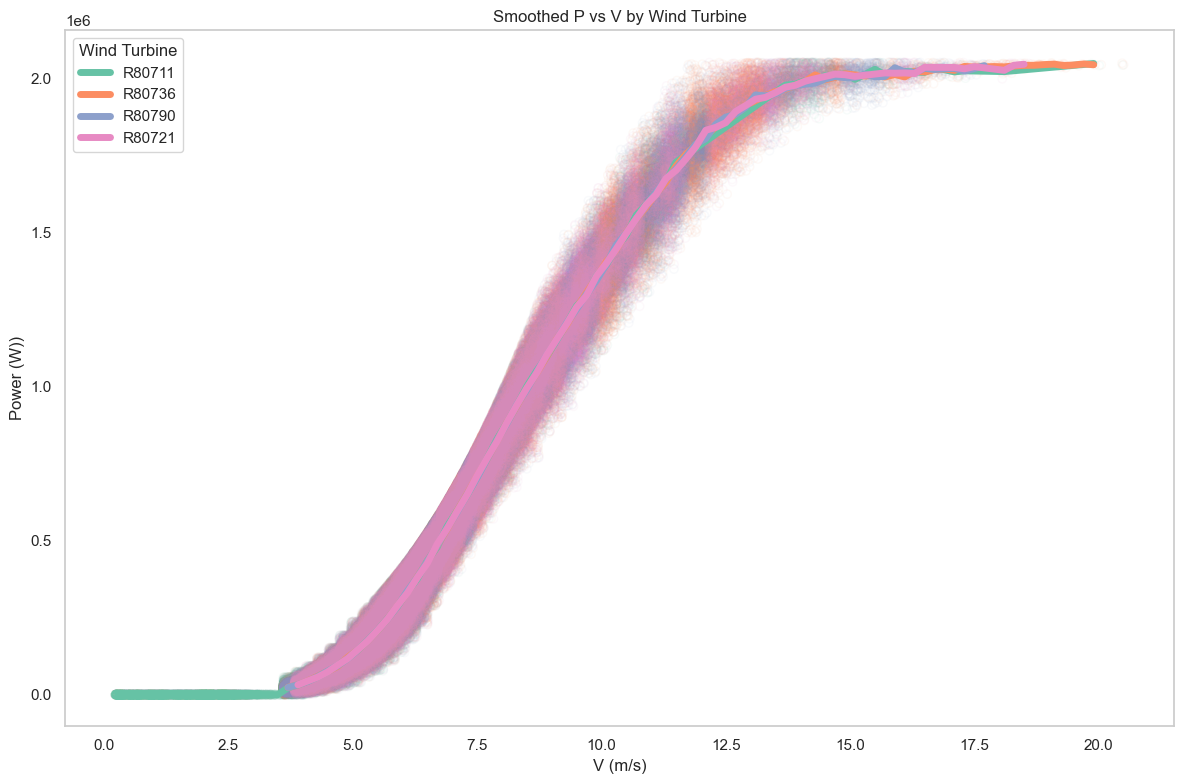

(602649, 8)


In [ ]:
# Assuming 'data_turbines' contains 'Cp', 'lambda', and 'turbine'
dataset = data_turbines.copy()  # Replace with your actual DataFrame if needed
 
# Get a color palette for the turbines
palette = sns.color_palette("Set2", n_colors=len(dataset['turbine'].unique()))

plt.figure(figsize=(12, 8))

# Iterate through each unique wind turbine and plot
for j, turbine in enumerate(dataset['turbine'].unique()):
    # Filter the data for the current turbine
    turbine_data = dataset[dataset['turbine'] == turbine]
    
    # Convert 'lambda' and 'Cp' to numpy arrays
    V_data = turbine_data['V'].to_numpy()
    P_data = turbine_data['P'].to_numpy()
    
    # Estimate the Cp curve with the median
    vmin = 0
    vmax = 20
    nbins = 100
    dv = (vmax-vmin)/nbins
    #P_estimated = np.zeros(nbins)
    #V_estimated = np.zeros(nbins)
    P_estimated = []
    V_estimated = []
    for i in range(1,nbins):
        vl = vmin + i*dv
        vr = vl + dv

        # Median of Cp in the bin i
        #V_estimated[i] = (vl+vr)/2.0
        v_subset = (vl<V_data) & (V_data<vr)  # subset of V points of the bin
        Pi = P_data[v_subset]     # P distribution of bin i
        if (len(Pi)>0):
            P_estimated.append(statistics.mean(Pi))
            V_estimated.append((vl+vr)/2.0)
        #else:
        #    P_estimated[i] = P_estimated[i-1]

    color = palette[j]
    plt.plot(V_estimated, P_estimated/1000, color = color, label=turbine, linewidth=5)
    plt.scatter(V_data, P_data/1000, facecolors='none', edgecolors=color, alpha=0.05)


# Add titles and labels
#plt.title('Smoothed P vs V by Wind Turbine')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW))')

# Add a legend to differentiate the turbines
plt.legend(title='Wind Turbine')

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
#plt.xlim((0,20))
plt.show()

print(data_turbines.shape)

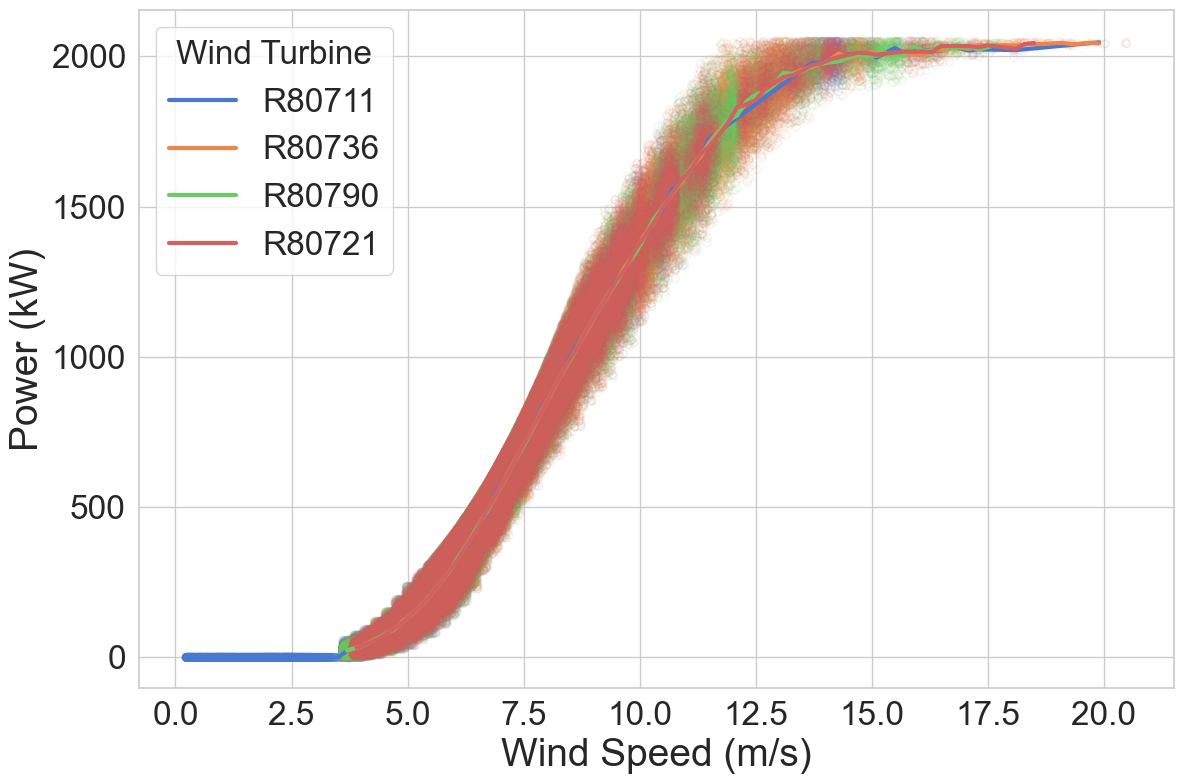

(602649, 8)


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Assuming 'data_turbines' contains 'Cp', 'lambda', and 'turbine'
dataset = data_turbines.copy()  # Replace with your actual DataFrame if needed


# Get a color palette for the turbines (you can change this to any valid Seaborn palette)
#palette = sns.color_palette("Set2", n_colors=len(dataset['turbine'].unique()))
#palette = sns.color_palette("coolwarm", n_colors=len(dataset['turbine'].unique()))
#palette = sns.color_palette(["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2"])
palette = sns.color_palette("muted", n_colors=len(dataset['turbine'].unique()))

plt.figure(figsize=(12, 8))

# Iterate through each unique wind turbine and plot
for j, turbine in enumerate(dataset['turbine'].unique()):
    # Filter the data for the current turbine
    turbine_data = dataset[dataset['turbine'] == turbine]
    
    # Convert 'lambda' and 'Cp' to numpy arrays
    V_data = turbine_data['V'].to_numpy()
    P_data = turbine_data['P'].to_numpy()
    
    # Estimate the Cp curve with the median
    vmin = 0
    vmax = 20
    nbins = 100
    dv = (vmax-vmin)/nbins
    P_estimated = []
    V_estimated = []
    for i in range(1, nbins):
        vl = vmin + i*dv
        vr = vl + dv

        # Median of Cp in the bin i
        v_subset = (vl < V_data) & (V_data < vr)  # subset of V points of the bin
        Pi = P_data[v_subset]  # P distribution of bin i
        if len(Pi) > 0:
            P_estimated.append(statistics.mean(Pi))
            V_estimated.append((vl + vr) / 2.0)

    # Choose a color for the turbine
    color = palette[j]
    
    # Plot the estimated Cp curve
    plt.plot(V_estimated, np.array(P_estimated) / 1000, color=color, label=turbine, linewidth=3)
    
    # Plot the scatter points with customized appearance
    plt.scatter(V_data, P_data / 1000, facecolors='none', edgecolors=color, alpha=0.1, s=30)

# Add titles and labels with larger font sizes
plt.xlabel('Wind Speed (m/s)', fontsize=28)
plt.ylabel('Power (kW)', fontsize=28)

# Increase size of legend and make it more readable
plt.legend(title='Wind Turbine', fontsize=24, title_fontsize=24)

# Customize ticks and labels for better readability
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Show grid for better readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Check the shape of the data (for debugging purposes)
print(data_turbines.shape)